Financial Planning

In [66]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [67]:
# Load .env environment variables

from dotenv import load_dotenv
load_dotenv(dotenv_path="API_Keys.env")

True

Part I: Financial Planner

Collect Crypto Prices Using the requests Library

In [68]:
# Set monthly household income

monthly_income = 12000

In [69]:
# Current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [70]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [71]:
# Fetch current BTC price

btc_response = requests.get(btc_url).json()

# Fetch current ETH price

eth_response = requests.get(eth_url).json()

# Compute current value of my crpto

my_btc_value = btc_response["data"]["1"]["quotes"]["USD"]["price"] * my_btc


my_eth_value = eth_response["data"]["1027"]["quotes"]["USD"]["price"] * my_eth

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13261.07
The current value of your 5.3 ETH is $1929.73


Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [72]:
# Current amount of shares

my_agg = 200
my_spy = 50

In [73]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("Alpaca_API_Key")
alpaca_secret_key = os.getenv("Alpaca_Secret_Key")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [74]:
# Format current date as ISO format

today = pd.Timestamp("2020-10-08", tz="America/New_York").isoformat()

# Set the tickers

ticker = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

# Get current closing prices for SPY and AGG

df_portfolio = api.get_barset(
    ticker,
    timeframe,
    start=today,
    end=today
).df

# Pick AGG and SPY close prices

agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.69
Current SPY closing price: $343.73


In [75]:
# Compute the current value of shares

my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
 
# Print current value of share

print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17186.50
The current value of your 200 AGG shares is $23538.00


Saving Health Analysis

In [76]:
# Create savings DataFrame

total_investments = (
    my_btc_value + my_eth_value, 
    my_spy_value + my_agg_value
)

df_savings = pd.DataFrame(total_investments, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame

display(df_savings)

,amount
crypto,15190.798
shares,40724.500


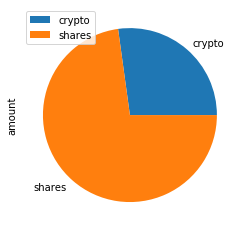

In [18]:
# Plot savings pie chart

df_savings.plot(kind='pie', y="amount")

In [65]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = sum(total_investments)

# Validate saving health

if total_savings > emergency_fund:
    print(f"Congradulations you have enough money in this fund!")
elif (total_savings == emergency_fund):
    print(f"Congradulations you are reaching your financial goal!")
elif (total_savings > emergency_fund):
        print(f"You are ${total_savings - emergency_fund} away from reaching you financial goal!")

Congradulations you have enough money in this fund!


Part 2 - Retirement Planning
Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data

df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [23]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [25]:
# Printing the simulation input data

MC_dist.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001378,1.000647,1.000637,0.989536,1.003573,0.999235,0.999808,1.006273,1.001104,0.993992,...,0.990326,0.999794,0.995769,0.994776,1.000956,1.000946,0.995558,0.997507,0.996597,0.993482
2,1.000231,0.995004,1.007019,0.997493,1.006318,1.002332,0.991653,1.005085,1.009928,0.998285,...,0.988159,1.003152,1.000043,0.990643,1.014431,0.990716,0.992970,1.010030,0.990891,0.986637
3,0.998187,0.988093,1.007046,0.996331,1.007295,1.004951,0.990205,1.003168,1.024923,0.994671,...,1.000544,1.005865,1.008161,0.994237,1.027148,0.999491,0.994400,1.008676,0.989640,0.994948
4,0.997391,0.991920,1.003126,0.997079,1.007934,1.014093,0.983995,1.003916,1.018516,0.991528,...,1.000462,1.009147,0.999366,1.010143,1.027174,0.999926,0.992615,1.005266,0.994151,0.991533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.555125,9.133577,14.355830,11.343207,9.992308,12.628391,1.769730,4.268037,10.563860,2.917000,...,9.846559,14.145055,13.785372,5.166140,13.093382,9.365096,18.653572,9.640177,9.945685,7.123671
7557,5.540621,9.111598,14.446059,11.159142,9.963614,12.636813,1.767355,4.209886,10.605777,2.909437,...,9.750248,14.166547,13.864669,5.182071,12.960267,9.379858,18.573338,9.741662,9.934554,7.114606
7558,5.541435,9.101691,14.361853,11.150412,9.864551,12.686756,1.755465,4.235916,10.494793,2.907056,...,9.736624,14.217383,13.923427,5.199956,12.837334,9.378658,18.259512,9.652987,10.064242,7.144185
7559,5.560877,9.107435,14.371862,11.207310,9.916462,12.583616,1.764135,4.296290,10.441245,2.898554,...,9.711309,14.263967,13.884374,5.213563,12.717643,9.303899,18.188599,9.623748,10.086312,7.115196


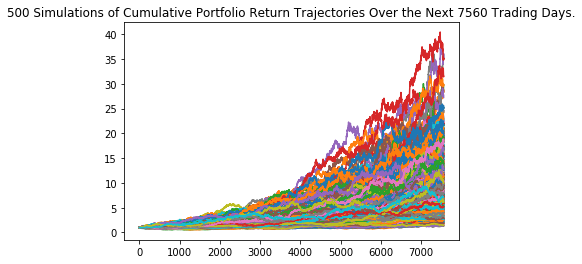

In [28]:
# Plot simulation outcomes

line_plot = MC_dist.plot_simulation()

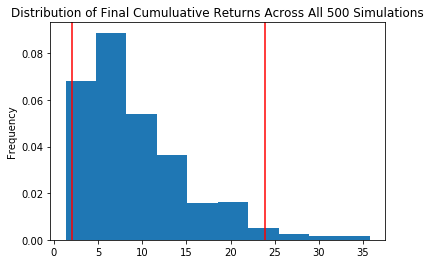

In [29]:
# Plot probability distribution and confidence intervals

dist_plot = MC_dist.plot_distribution()

Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           500.000000
mean              9.318672
std               6.033829
min               1.329101
25%               4.987355
50%               7.756137
75%              12.561527
max              35.778375
95% CI Lower      2.051560
95% CI Upper     23.880658
Name: 7560, dtype: float64


Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [31]:
# Set initial investment

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41031.21 and $477613.16


How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [32]:
# Set initial investment

initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $61546.81 and $716419.74


Optional Challenge - Early Retirement

Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992957,1.006830,1.009055,1.008848,1.002733,1.003398,0.991962,1.003932,1.009445,0.999048,...,1.003645,0.992058,0.989073,1.004112,1.001631,1.007428,0.997895,0.998254,0.994174,1.000168
2,0.979958,1.001058,1.015985,1.007108,0.992059,0.996745,0.985171,1.016113,1.015015,1.009069,...,1.007082,0.991802,0.986441,1.011411,0.995124,1.007328,0.988646,1.005735,0.998720,0.994781
3,0.995595,1.012827,1.020034,1.014982,0.999146,0.991800,0.995191,1.018664,1.018231,1.016459,...,1.005228,0.994995,0.992570,1.018960,0.981457,1.016354,0.994505,1.004957,1.006334,0.998202
4,0.992361,1.025322,1.017481,1.015872,0.998550,0.998025,0.990129,1.007841,1.018170,1.017784,...,0.998675,1.000496,0.982169,1.018505,0.976649,1.012924,0.999030,0.993981,1.015384,0.993201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.469945,1.365569,1.749541,1.110071,1.596884,1.456500,1.094436,1.812207,1.008198,2.353921,...,1.943403,1.254732,1.236587,1.886663,1.048377,1.380883,1.341055,1.216678,1.862782,1.410271
1257,1.482528,1.369411,1.729820,1.106649,1.598326,1.464308,1.102809,1.799339,1.018340,2.351436,...,1.962473,1.264814,1.226767,1.873845,1.053119,1.381342,1.343333,1.209982,1.851061,1.418376
1258,1.461713,1.384640,1.742992,1.117821,1.578893,1.462386,1.130647,1.797833,1.018467,2.319655,...,1.950073,1.245049,1.233475,1.874538,1.053902,1.384327,1.351743,1.207528,1.859790,1.435696
1259,1.474263,1.380500,1.739519,1.114862,1.575931,1.467625,1.123860,1.785038,1.020906,2.320972,...,1.953908,1.236595,1.239971,1.875522,1.052310,1.370991,1.350470,1.207633,1.866718,1.426829


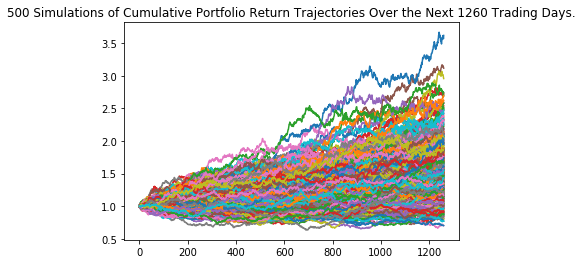

In [35]:
# Plot simulation outcomes

line_plot = MC_fiveyears.plot_simulation()

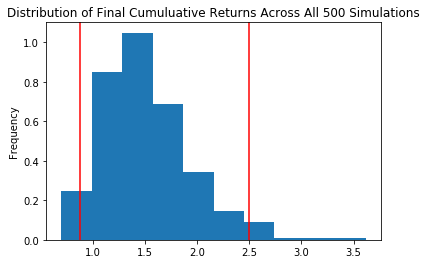

In [36]:
# Plot probability distribution and confidence intervals

dist_plot = MC_fiveyears.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_five = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics

print(tbl_five)

count           500.000000
mean              1.507957
std               0.417972
min               0.699647
25%               1.217629
50%               1.450262
75%               1.729784
max               3.616126
95% CI Lower      0.875438
95% CI Upper      2.494816
Name: 1260, dtype: float64


In [38]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $123093.62 and $1432839.47


Ten Year Retirement Option 

In [39]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [40]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003257,1.006547,0.998588,0.994300,1.000408,0.994100,0.995008,0.995708,0.993591,0.995107,...,1.000676,1.005998,1.004896,1.001501,1.014061,1.001439,1.004140,0.994657,0.989933,0.991559
2,0.993130,1.008237,0.996220,0.998976,0.983483,0.993214,0.988409,0.996381,0.984653,1.002754,...,0.999829,1.017933,1.006022,1.003827,1.009926,1.003040,0.991149,1.001754,0.986865,0.990756
3,0.995018,1.007818,0.991046,1.016973,0.983830,1.007415,0.990219,1.008719,0.977632,1.004588,...,1.001829,1.011432,1.006979,0.998588,1.017226,1.006812,0.986221,0.999044,0.988832,1.003460
4,1.008594,1.000323,0.988909,1.007326,0.974172,0.987264,0.986833,1.009066,0.990833,1.014721,...,1.005197,1.009075,1.008258,1.004295,1.007667,1.010963,0.990755,0.998232,0.992672,1.007739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.447053,1.348582,1.368304,1.608598,2.782619,1.874057,1.468726,1.311265,2.471067,2.926557,...,1.473835,1.580756,1.944749,1.402511,2.890554,2.043710,1.546593,2.293000,1.417352,3.257482
2517,1.442463,1.347024,1.369295,1.602158,2.800068,1.877354,1.475930,1.307543,2.448806,2.910323,...,1.489565,1.578530,1.939620,1.400044,2.895626,2.016877,1.557987,2.285815,1.432406,3.276752
2518,1.416844,1.346304,1.358949,1.617235,2.834865,1.871108,1.473684,1.320064,2.462606,2.931035,...,1.509232,1.592489,1.943815,1.390543,2.894793,2.047411,1.547059,2.266112,1.422478,3.295678
2519,1.409595,1.333845,1.366135,1.652878,2.833235,1.868416,1.474067,1.322717,2.454715,2.965306,...,1.500602,1.603804,1.934913,1.394309,2.916863,2.035356,1.533781,2.253679,1.430390,3.317945


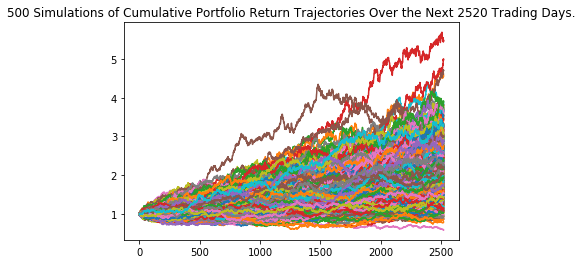

In [41]:
# Plot simulation outcomes

line_plot = MC_tenyears.plot_simulation()

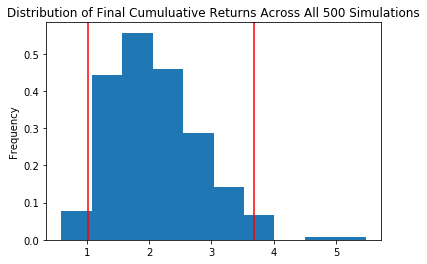

In [42]:
# Plot probability distribution and confidence intervals

dist_plot = MC_tenyears.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_ten = MC_tenyears.summarize_cumulative_return()

# Print summary statistics

print(tbl_ten)

count           500.000000
mean              2.094195
std               0.719511
min               0.590340
25%               1.558663
50%               2.005880
75%               2.540656
max               5.476472
95% CI Lower      1.016933
95% CI Upper      3.678800
Name: 2520, dtype: float64


In [45]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $123093.62 and $1432839.47
